### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [9]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.
3. Decide what to do about your missing data -- drop, replace, other...

Import missing Python Libraries

In [15]:
import plotly.express as px

### Eliminate Duplicates

One can check for duplicates by comparing the shapes of the DataFrame before and after removing duplicates.
**74 duplicates are found.**

In [18]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
print("Before removing duplicates:", data.shape)

Before removing duplicates: (12684, 26)


In [22]:
#remove duplicates
clean_data = data.drop_duplicates()
print("After removing duplicates:", clean_data.shape)

After removing duplicates: (12610, 26)


### Checking for missing values.

There are missing values in the DataFrame for 6 columns. The 'car' column is specially problematic.
Need to review the values used on these 6 columns and decide next steps

In [25]:
missing_counts = clean_data.isnull().sum().sort_values()
print(missing_counts)

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      129
CarryAway                 150
Restaurant20To50          189
CoffeeHouse               217
car                     12502
dtype: int64


In [27]:
# List the columns with null data to allow further review
missingval_columns = clean_data.isnull().any(axis=0)
print("List of Columns Review ",'\n',missingval_columns,'\n')
missingval_columns_list = missingval_columns[missingval_columns].index.tolist()
print("List of Columns Missing Data ",'\n',missingval_columns_list,'\n')
# Review the values available for each column missing values
for column in missingval_columns_list:
    print("Values for ",column)
    print(clean_data[column].unique())
    print()

List of Columns Review  
 destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool 

List of Columns Missing Data  
 ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] 

Values for  car
[nan 'Scooter and motorcycle' 'crossover' '

**Drop the 'car' column**

The missing car values is impacting 12502 rows out of a total of 12610, there is not enough valid data available on this column to drive any analysis so we'll drop it

In [30]:
clean_data = clean_data.drop('car', axis=1)

In [32]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null  obj

**Remove rows with Null values**

After removing the car column, we can now proceed to remove the rows with null values

In [35]:
clean_data=clean_data.dropna()

In [37]:
#Verify we have no more missing values on our clean_data
missing_counts = clean_data.isnull().sum().sort_values()
print(missing_counts)

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
direction_opp           0
occupation              0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
education               0
Y                       0
dtype: int64


In [39]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

### Structural Errors check
We are now left with 12007 rows with no duplicates and no null values
Now we proceed to check the values for the other columns looking for structural errors

In [42]:
all_columns_list = missingval_columns.index.tolist()

#Review the values available for each good column
for column in all_columns_list:
    if column not in missingval_columns_list:
        print("Values for ",column)
        print(clean_data[column].value_counts())
        print()

Values for  destination
destination
No Urgent Place    5953
Home               3078
Work               2976
Name: count, dtype: int64

Values for  passanger
passanger
Alone        6914
Friend(s)    3142
Partner      1018
Kid(s)        933
Name: count, dtype: int64

Values for  weather
weather
Sunny    9545
Snowy    1323
Rainy    1139
Name: count, dtype: int64

Values for  temperature
temperature
80    6171
55    3652
30    2184
Name: count, dtype: int64

Values for  time
time
6PM     3068
7AM     2976
10AM    2154
2PM     1913
10PM    1896
Name: count, dtype: int64

Values for  coupon
coupon
Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
Name: count, dtype: int64

Values for  expiration
expiration
1d    6702
2h    5305
Name: count, dtype: int64

Values for  gender
gender
Female    6158
Male      5849
Name: count, dtype: int64

Values for  age
age
21         2526
26         2388
31    

4. What proportion of the total observations chose to accept the coupon?



In [45]:
accepted_coupons_count = clean_data['Y'].value_counts()[1]
total_coupons_issued = clean_data['Y'].value_counts().sum()
prop_accepted_coupons = (accepted_coupons_count / total_coupons_issued)*100
print("The proportion of accepted coupons is: ",prop_accepted_coupons.round(2),"%")

The proportion of accepted coupons is:  56.84 %


5. Use a bar plot to visualize the `coupon` column.

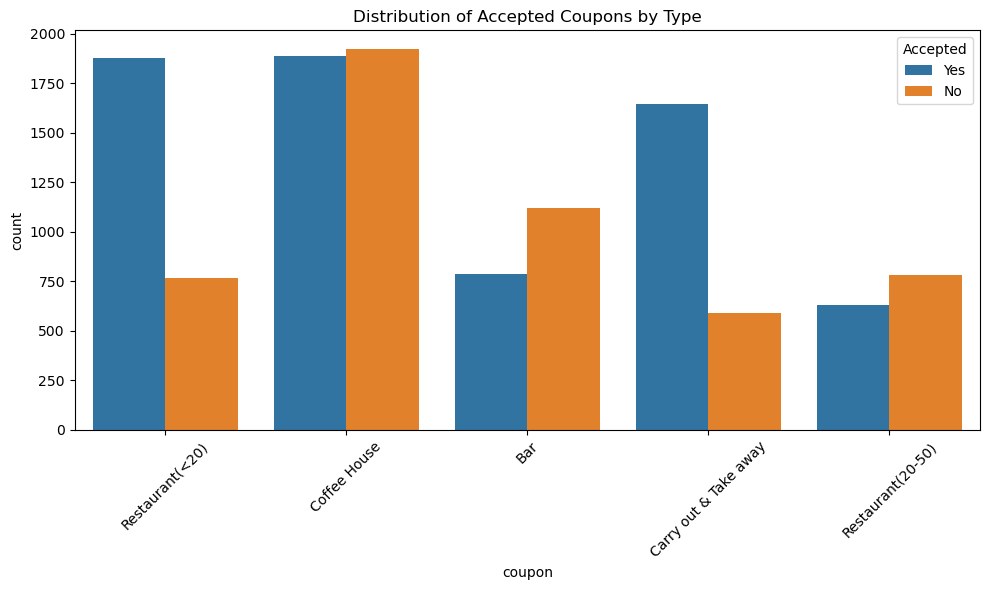

In [47]:
# Added "Accepted" column based on "Y" columns from 1 to Yes and from 0 to No
# This will help the diagrams read a lot easier
clean_data.loc[:,"Accepted"]=np.where((clean_data['Y'] == 1),'Yes','No')

plt.figure(figsize=(10, 6))
sns.countplot(x='coupon', hue='Accepted', data=clean_data)
plt.title(f'Distribution of Accepted Coupons by Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

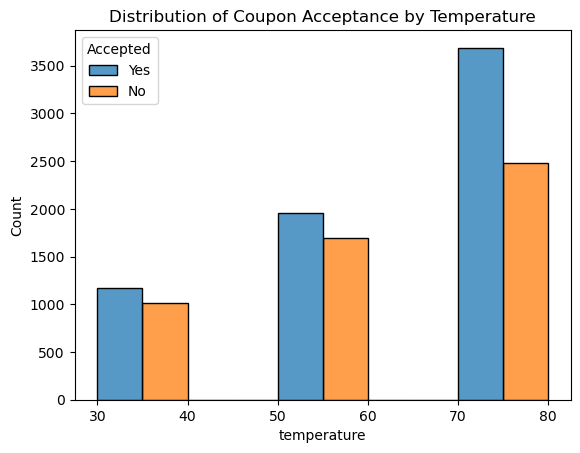

In [50]:
sns.histplot(clean_data, x='temperature', hue='Accepted', binwidth=10, multiple="dodge")
plt.title("Distribution of Coupon Acceptance by Temperature")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [53]:
print("All coupons count: ","\n",clean_data['coupon'].value_counts(),"\n")
coupons_bar_only = clean_data.query("coupon == 'Bar'")
print("Only Bar coupons distribution : ","\n",coupons_bar_only['Accepted'].value_counts())


All coupons count:  
 coupon
Coffee House             3809
Restaurant(<20)          2646
Carry out & Take away    2233
Bar                      1906
Restaurant(20-50)        1413
Name: count, dtype: int64 

Only Bar coupons distribution :  
 Accepted
No     1121
Yes     785
Name: count, dtype: int64


2. What proportion of bar coupons were accepted?


In [56]:
accepted_bar_coupons_count = coupons_bar_only['Y'].value_counts()[1]
total_bar_coupons_issued = coupons_bar_only['Y'].value_counts().sum()
prop_bar_accepted_coupons = (accepted_bar_coupons_count / total_bar_coupons_issued)*100
print("The proportion of accepted BAR coupons is: ",prop_bar_accepted_coupons.round(2),"%")

The proportion of accepted BAR coupons is:  41.19 %


In [58]:
# Creating a function to calculate the ratio of acceptance for any given subsetted dataframe
def ratio_of_acceptance(datafr):
    if (datafr['Y'].value_counts().sum()) == 0:
        return 0
    else:
        ratio = datafr['Y'].value_counts()[1] / datafr['Y'].value_counts().sum()
        return ratio


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [61]:
# Analyze the general data for Bar coupons issued and accepted and the frequency categories
bar_coupons_accepted = coupons_bar_only.query("Accepted == 'Yes'")
print ("Total Bar Coupons Issued: ",total_bar_coupons_issued,"\n","Total Bar Coupons Accepted ",accepted_bar_coupons_count)
print("Distribution of Issued Bar Coupons by Frequency of Bar Visits: \n",coupons_bar_only['Bar'].value_counts(),"\n")
print("Distribution of Accepted Bar Coupons by Frequency of Bar Visits: \n",bar_coupons_accepted['Bar'].value_counts(),"\n")

# Create data subsets for each visit category
three_or_less_visits_data = coupons_bar_only[coupons_bar_only['Bar'].isin(['never', 'less1', '1~3'])]
over_three_visits_data = coupons_bar_only[coupons_bar_only['Bar'].isin(['4~8', 'gt8'])]
print ("Ratio of Accepted Bar Coupons by people with 3 or less visits: \n",((ratio_of_acceptance(three_or_less_visits_data))*100).round(2),"%")
print ("Ratio of Accepted Bar Coupons by people with OVER 3 visits: \n",((ratio_of_acceptance(over_three_visits_data))*100).round(2),"%")


Total Bar Coupons Issued:  1906 
 Total Bar Coupons Accepted  785
Distribution of Issued Bar Coupons by Frequency of Bar Visits: 
 Bar
never    788
less1    546
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64 

Distribution of Accepted Bar Coupons by Frequency of Bar Visits: 
 Bar
1~3      245
less1    244
never    149
4~8      114
gt8       33
Name: count, dtype: int64 

Ratio of Accepted Bar Coupons by people with 3 or less visits: 
 37.24 %
Ratio of Accepted Bar Coupons by people with OVER 3 visits: 
 76.17 %


**The ratio indicates that drivers who visited the bar more than 3 times per week accepted the bar coupons 76% of the time while the rest only accepeted 37% of the time.**
Note that the number of ISSUED coupons to drivers with less than 3 visits is 1713 as opposed to only 193 issued to the people with Over 3 visits.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [65]:
# Create 2 list of values to separate analysis
monthly_or_more_visits = ['1~3', '4~8', 'gt8']
above_25_years_old = ['26', '31', '36', '41', '46', '50plus']

print("Coupons Bar only: ",coupons_bar_only['Y'].value_counts().sum())
# Create subsetted dataframes and calucate Ratio using the function
ovr25_monthly_data = coupons_bar_only[(coupons_bar_only['Bar'].isin(monthly_or_more_visits)) & (coupons_bar_only['age'].isin(above_25_years_old))]
print ("Ratio of Accepted Bar Coupons by Drivers OVER 25 years old who ALSO visit the Bar at least 1 per month: \n",((ratio_of_acceptance(ovr25_monthly_data))*100).round(2),"%")

# The question asks for all the other drivers not included on the first category which could include drivers over 25 who never go to the bar, 
# this is different than asking for drivers below 25 who go to the bar less than once per month
# the subset should include everyone else outside the first selection
everyone_else_data = coupons_bar_only[~(coupons_bar_only['Bar'].isin(monthly_or_more_visits) & (coupons_bar_only['age'].isin(above_25_years_old)))]
print ("Ratio of Accepted Bar Coupons by all other drivers: \n",((ratio_of_acceptance(everyone_else_data))*100).round(2),"%")





Coupons Bar only:  1906
Ratio of Accepted Bar Coupons by Drivers OVER 25 years old who ALSO visit the Bar at least 1 per month: 
 68.98 %
Ratio of Accepted Bar Coupons by all other drivers: 
 33.73 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [68]:
# Create list of values to separate analysis
monthly_or_more_visits = ['1~3', '4~8', 'gt8']
no_kid_passengers = ['Friend(s)', 'Partner'] #Exclude both Kid(s) and Alone
excluded_occupation = ['Farming Fishing & Forestry']

# Create subsetted dataframes and calucate Ratio using the function
selected_data = coupons_bar_only[(coupons_bar_only['Bar'].isin(monthly_or_more_visits)) & (coupons_bar_only['passanger'].isin(no_kid_passengers)) & (~coupons_bar_only['occupation'].isin(excluded_occupation))]
print ("Ratio of Accepted Bar Coupons by Drivers who visit the Bar more than once per month,\n who ALSO had passengers that were not a kid AND had occupations other than farming, fishing or forestry: \n",((ratio_of_acceptance(selected_data))*100).round(2),"%")

# this 2nd subset should include everyone else outside the first selection
everyone_else_data = coupons_bar_only[~((coupons_bar_only['Bar'].isin(monthly_or_more_visits)) & (coupons_bar_only['passanger'].isin(no_kid_passengers)) & (~coupons_bar_only['occupation'].isin(excluded_occupation)))]
print ("Ratio of Accepted Bar Coupons by all other drivers: \n",((ratio_of_acceptance(everyone_else_data))*100).round(2),"%")


Ratio of Accepted Bar Coupons by Drivers who visit the Bar more than once per month,
 who ALSO had passengers that were not a kid AND had occupations other than farming, fishing or forestry: 
 71.43 %
Ratio of Accepted Bar Coupons by all other drivers: 
 37.86 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [71]:
# Create list of values to separate analysis
monthly_or_more_visits = ['1~3', '4~8', 'gt8']
no_kid_passengers = ['Friend(s)', 'Partner'] #Exclude both Kid(s) and Alone
under_30 = ['below21', '21', '26']
cheap_restaurant_visits = ['4~8', 'gt8'] 
income_less_50 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']


# Create subsetted dataframes and calucate Ratio using the function
selected_data_1 = coupons_bar_only[(coupons_bar_only['Bar'].isin(monthly_or_more_visits)) & (coupons_bar_only['passanger'].isin(no_kid_passengers)) & (~coupons_bar_only['maritalStatus'].isin(['widowed'])) ]
print ("Ratio of Accepted Bar Coupons by Drivers who go to bars more than once a month, \n had passengers that were not a kid, and were not widowed ",((ratio_of_acceptance(selected_data_1))*100).round(2),"%")

selected_data_2 = coupons_bar_only[(coupons_bar_only['Bar'].isin(monthly_or_more_visits)) & (coupons_bar_only['age'].isin(under_30))]
print ("Ratio of Accepted Bar Coupons by Drivers who go to bars more than once a month and are under the age of 30  ",((ratio_of_acceptance(selected_data_2))*100).round(2),"%")

selected_data_3 = coupons_bar_only[(coupons_bar_only['RestaurantLessThan20'].isin(cheap_restaurant_visits)) & (coupons_bar_only['income'].isin(income_less_50))]
print ("Ratio of Accepted Bar Coupons by Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K  ",((ratio_of_acceptance(selected_data_3))*100).round(2),"%")


Ratio of Accepted Bar Coupons by Drivers who go to bars more than once a month, 
 had passengers that were not a kid, and were not widowed  71.43 %
Ratio of Accepted Bar Coupons by Drivers who go to bars more than once a month and are under the age of 30   71.95 %
Ratio of Accepted Bar Coupons by Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K   45.65 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

It's clear that people who visit the bar more than once per month have a tendency to accept the bar coupons more than others, most ratios including this condition were around the 70% acceptance rate.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Coffee House coupons have a high acceptance rate based on the coupons Histogram of question 5 ###
Will analyse trends among the coffee house coupons issued and accepted

In [102]:
# Review coffee coupons acceptance proportions
coupons_coffee_only = clean_data.query("coupon == 'Coffee House'")
accepted_coffee_coupons_count = coupons_coffee_only['Y'].value_counts()[1]
total_coffee_coupons_issued = coupons_coffee_only['Y'].value_counts().sum()
prop_coffee_accepted_coupons = (accepted_coffee_coupons_count / total_coffee_coupons_issued)*100
print("The proportion of accepted COFFEE coupons is: ",prop_coffee_accepted_coupons.round(2),"%")

# Analyze the general data for Coffee House coupons issued and accepted and the frequency categories
coffee_coupons_accepted = coupons_coffee_only.query("Accepted == 'Yes'")
print ("Total Coffee Coupons Issued: ",total_coffee_coupons_issued,"\n","Total Coffee Coupons Accepted ",accepted_coffee_coupons_count)
print("Distribution of Issued Coffee Coupons by Frequency of Coffee House Visits: \n",coupons_coffee_only['CoffeeHouse'].value_counts(),"\n")
print("Distribution of Accepted Coffee Coupons by Frequency Coffee House Visits: \n",coffee_coupons_accepted['CoffeeHouse'].value_counts(),"\n")

# Create data subsets for each visit category
three_or_less_visits_data = coupons_coffee_only[coupons_coffee_only['CoffeeHouse'].isin(['never', 'less1', '1~3'])]
over_three_visits_data = coupons_coffee_only[coupons_coffee_only['CoffeeHouse'].isin(['4~8', 'gt8'])]
print ("Ratio of Accepted Coffee Coupons by people with 3 or less visits: \n",((ratio_of_acceptance(three_or_less_visits_data))*100).round(2),"%")
print ("Ratio of Accepted Coffee Coupons by people with OVER 3 visits: \n",((ratio_of_acceptance(over_three_visits_data))*100).round(2),"%")

# Create data subsets for age brackets
under_30 = ['below21', '21', '26']
under_30_data = coupons_coffee_only[coupons_coffee_only['age'].isin(under_30)]
over_30_data = coupons_coffee_only[~(coupons_coffee_only['age'].isin(under_30))]
print ("Ratio of Accepted Coffee Coupons by people under 30 years old: \n",((ratio_of_acceptance(under_30_data))*100).round(2),"%")
print ("Ratio of Accepted Coffee Coupons by people over 30 years old: \n",((ratio_of_acceptance(over_30_data))*100).round(2),"%")

#Create data subsets for Income brackets
income_less_50 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
less_50K_data = coupons_coffee_only[coupons_coffee_only['income'].isin(income_less_50)]
over_50K_data = coupons_coffee_only[~(coupons_coffee_only['income'].isin(income_less_50))]
print ("Ratio of Accepted Coffee Coupons by people with Income < 50K: \n",((ratio_of_acceptance(less_50K_data))*100).round(2),"%")
print ("Ratio of Accepted Coffee Coupons by people with Income >= 50K: \n",((ratio_of_acceptance(over_50K_data))*100).round(2),"%")


The proportion of accepted COFFEE coupons is:  49.57 %
Total Coffee Coupons Issued:  3809 
 Total Coffee Coupons Accepted  1888
Distribution of Issued Coffee Coupons by Frequency of Coffee House Visits: 
 CoffeeHouse
less1    1049
1~3      1015
never     896
4~8       507
gt8       342
Name: count, dtype: int64 

Distribution of Accepted Coffee Coupons by Frequency Coffee House Visits: 
 CoffeeHouse
1~3      657
less1    503
4~8      346
gt8      225
never    157
Name: count, dtype: int64 

Ratio of Accepted Coffee Coupons by people with 3 or less visits: 
 44.49 %
Ratio of Accepted Coffee Coupons by people with OVER 3 visits: 
 67.26 %
Ratio of Accepted Coffee Coupons by people under 30 years old: 
 52.86 %
Ratio of Accepted Coffee Coupons by people over 30 years old: 
 46.67 %
Ratio of Accepted Coffee Coupons by people with Income < 50K: 
 52.28 %
Ratio of Accepted Coffee Coupons by people with Income >= 50K: 
 46.44 %


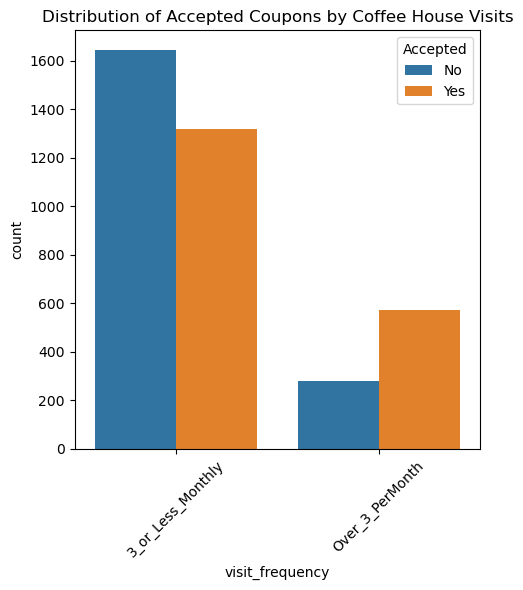

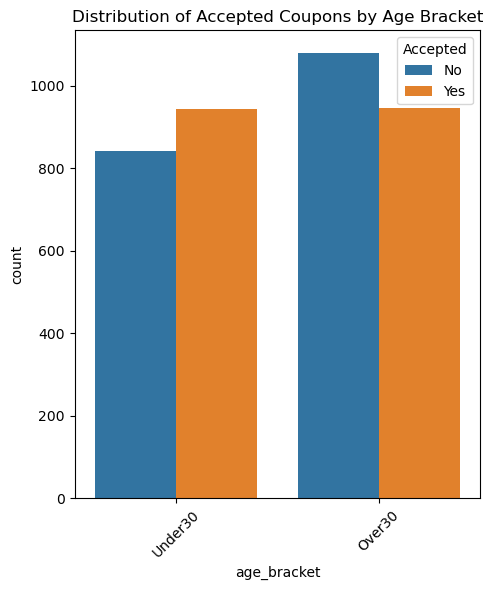

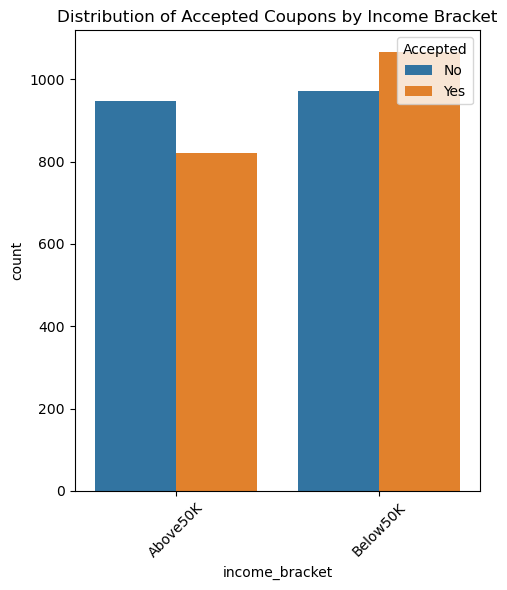

In [104]:
# Use bar plots to analyze coffee house coupons
under_30 = ['below21', '21', '26']
income_less_50 = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
with pd.option_context("mode.copy_on_write", True):
    coupons_coffee_only.loc[:,"visit_frequency"]=np.where((coupons_coffee_only['CoffeeHouse'].isin(['never', 'less1', '1~3'])),'3_or_Less_Monthly','Over_3_PerMonth')
    # Age Bracket for below and above 30
    coupons_coffee_only.loc[:,"age_bracket"]=np.where((coupons_coffee_only['age'].isin(under_30)),'Under30','Over30')
    # Income will for less or more than 50K
    coupons_coffee_only.loc[:,"income_bracket"]=np.where((coupons_coffee_only['income'].isin(income_less_50)),'Below50K','Above50K')


plt.figure(figsize=(5, 6))
sns.countplot(x='visit_frequency', hue='Accepted', data=coupons_coffee_only)
plt.title(f'Distribution of Accepted Coupons by Coffee House Visits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 6))
sns.countplot(x='age_bracket', hue='Accepted', data=coupons_coffee_only)
plt.title(f'Distribution of Accepted Coupons by Age Bracket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 6))
sns.countplot(x='income_bracket', hue='Accepted', data=coupons_coffee_only)
plt.title(f'Distribution of Accepted Coupons by Income Bracket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The coffee house coupons analysis shows a similar trend than the bar coupons when it comes to people who visit coffee houses more than 3 times per month, like with the bar visits, these drivers have over 67% acceptance.

The next category that shows relevance is the age bracket, seems like the younger crowd (below 30) is more prone to accept the coffee coupons based on over 52% acceptance.

A recommended review would be to review acceptance with both variables in play at the same time, age and frequency of visits.